In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

Filter from_npi to be entity type 1 and to_npi to be entity type 2.

In [2]:
db = sqlite3.connect('data/hop_team.sqlite')

In [3]:
db.execute('CREATE INDEX from_npi ON nucc(from_npi)')

In [4]:
db.execute('CREATE INDEX to_npi ON nucc(to_npi)')

In [3]:
db.close()

In [4]:
query = '''
WITH from_npi_list AS (
SELECT npi
FROM npi
WHERE entity_type_code = 1.0
),
to_npi_list AS (
SELECT npi
FROM npi
WHERE entity_type_code = 2.0
)
SELECT * 
FROM nucc
WHERE from_npi IN from_npi_list 
AND to_npi IN to_npi_list
'''

with sqlite3.connect('data/hop_team.sqlite') as db:
    filtered_hop = pd.read_sql(query,db)

In [5]:
filtered_hop.head()

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait
0,1265564736,1003000209,22,148,0.000,0.000
1,1508948191,1003000217,13,13,58.308,58.890
2,1518902246,1003000217,17,19,58.684,78.352
3,1538309737,1003000217,27,27,114.037,84.773
4,1801826672,1003000217,14,21,46.524,51.874


In [12]:
filtered_hop[filtered_hop['average_day_wait'] == 0]

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait
0,1265564736,1003000209,22,148,0.0,0.0
29,1881710101,1003000217,185,227,0.0,0.0
64,1962528539,1003000217,308,412,0.0,0.0
230,1154383313,1003000274,836,2400,0.0,0.0
382,1790837938,1003000399,20,58,0.0,0.0
...,...,...,...,...,...,...
54527955,1831266428,1992999353,48,342,0.0,0.0
54527988,1942288451,1992999544,310,1049,0.0,0.0
54527995,1275697013,1992999601,33,222,0.0,0.0
54527996,1538430988,1992999775,45,47,0.0,0.0


In [17]:
filtered_hop['patient_count']

127792

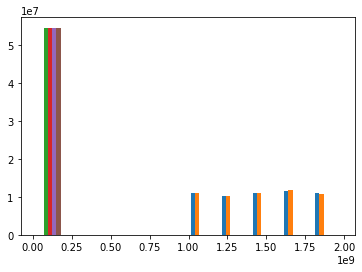

In [19]:
plt.hist(x = filtered_hop[filtered_hop['patient_count'] < 127792 ]);

In [22]:
query = 'PRAGMA table_info ("cbsa")'
with sqlite3.connect('data/hop_team.sqlite') as db:
    tables = pd.read_sql(query,db)

In [23]:
tables

,cid,name,type,notnull,dflt_value,pk
0,0,zip,INTEGER,0,None,0
1,1,cbsa,INTEGER,0,None,0
2,2,usps_zip_pref_city,TEXT,0,None,0
3,3,usps_zip_pref_state,TEXT,0,None,0
4,4,res_ratio,REAL,0,None,0
5,5,bus_ratio,REAL,0,None,0
6,6,oth_ratio,REAL,0,None,0
7,7,tot_ratio,REAL,0,None,0


In [24]:
query = '''
SELECT *
FROM cbsa 
LIMIT 5;
'''
with sqlite3.connect('data/hop_team.sqlite') as db:
    cbsa = pd.read_sql(query,db)

In [25]:
cbsa

,zip,cbsa,usps_zip_pref_city,usps_zip_pref_state,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,683,41900,SAN GERMAN,PR,0.999842,1.0,1.0,0.999855
1,683,32420,SAN GERMAN,PR,0.000158,0.0,0.0,0.000145
2,923,41980,SAN JUAN,PR,1.000000,1.0,1.0,1.000000
3,1010,44140,BRIMFIELD,MA,0.976896,1.0,1.0,0.977816
4,1010,49340,BRIMFIELD,MA,0.023104,0.0,0.0,0.022184


In [42]:
query = '''
SELECT *
FROM npi
LIMIT 5;
'''
with sqlite3.connect('data/hop_team.sqlite') as db:
    npi = pd.read_sql(query,db)

In [43]:
npi

,npi,entity_type_code,provider_organization_name_(legal_business_name),provider_last_name_(legal_name),provider_first_name,provider_middle_name,provider_name_prefix_text,provider_name_suffix_text,provider_credential_text,provider_first_line_business_practice_location_address,provider_second_line_business_practice_location_address,provider_business_practice_location_address_city_name,provider_business_practice_location_address_state_name,provider_business_practice_location_address_postal_code
0,1679576722,1.0,None,WIEBE,DAVID,A,None,None,M.D.,3500 CENTRAL AVE,None,KEARNEY,NE,688472944.0
1,1588667638,1.0,None,PILCHER,WILLIAM,C,DR.,None,MD,1824 KING STREET,SUITE 300,JACKSONVILLE,FL,322044736.0
2,1497758544,2.0,"CUMBERLAND COUNTY HOSPITAL SYSTEM, INC",None,None,None,None,None,None,3418 VILLAGE DR,None,FAYETTEVILLE,NC,283044552.0
3,1306849450,NaN,None,None,None,None,None,None,None,None,None,None,None,NaN
4,1215930367,1.0,None,GRESSOT,LAURENT,None,DR.,None,M.D.,17323 RED OAK DR,None,HOUSTON,TX,770901243.0


In [48]:
query = '''
WITH npi_stuff AS (SELECT 
    npi,
    entity_type_code,
    "provider_organization_name_(legal_business_name)",
    "provider_last_name_(legal_name)",
    provider_first_name,
    provider_middle_name,
    provider_name_prefix_text,
    provider_name_suffix_text,
    provider_credential_text,
    provider_first_line_business_practice_location_address,
    provider_second_line_business_practice_location_address,
    provider_business_practice_location_address_city_name,
    provider_business_practice_location_address_state_name,
    substring(npi.provider_business_practice_location_address_postal_code, 1, 5) AS zip_code
FROM npi),
cbsa_stuff AS (
SELECT 
    zip,
    cbsa,
    usps_zip_pref_city
FROM cbsa
WHERE cbsa = 34980
)
SELECT *
FROM npi_stuff AS n
INNER JOIN cbsa_stuff AS c
ON n.zip_code = c.zip
'''
with sqlite3.connect('data/hop_team.sqlite') as db:
    npi = pd.read_sql(query,db)

In [49]:
npi.head()

,npi,entity_type_code,provider_organization_name_(legal_business_name),provider_last_name_(legal_name),provider_first_name,provider_middle_name,provider_name_prefix_text,provider_name_suffix_text,provider_credential_text,provider_first_line_business_practice_location_address,provider_second_line_business_practice_location_address,provider_business_practice_location_address_city_name,provider_business_practice_location_address_state_name,zip_code,zip,cbsa,usps_zip_pref_city
0,1134122187,1.0,None,RUDNICKE,CHERYL,DENISE,MRS.,None,CRNP,250 25TH AVE N,STE 412,NASHVILLE,TN,37203,37203,34980,NASHVILLE
1,1003819046,1.0,None,NYLANDER,BARBARA,H,None,None,M.D.,345 23RD AVE N,SUITE 209,NASHVILLE,TN,37203,37203,34980,NASHVILLE
2,1750384780,1.0,None,PERRIGIN,JULIE,A,DR.,None,MD,219 CHURCH ST,None,DICKSON,TN,37055,37055,34980,DICKSON
3,1922001957,1.0,None,PRESLEY,RICHARD,E,None,None,M.D.,2011 MURPHY AVE,STE 302,NASHVILLE,TN,37203,37203,34980,NASHVILLE
4,1073516001,1.0,None,ROSS,DAVID,L,DR.,None,MD,127 CRESTVIEW PARK DR,None,DICKSON,TN,37055,37055,34980,DICKSON


In [ ]:
query = '''
WITH from_npi_list AS (
SELECT npi
FROM npi
WHERE entity_type_code = 1.0
),
to_npi_list AS (
SELECT npi
FROM npi
WHERE entity_type_code = 2.0
),
from_npi_adress AS (
WITH npi_stuff AS (SELECT 
    npi AS from_npi_1,
    entity_type_code AS from_entity_code,
    "provider_organization_name_(legal_business_name)" AS from_org_name,
    "provider_last_name_(legal_name)" AS from_last_name,
    provider_first_name AS from_first_name,
    provider_middle_name AS from_middle_name,
    provider_credential_text AS from_credential_text,
    provider_first_line_business_practice_location_address AS from_address_1,
    provider_second_line_business_practice_location_address AS from_address_2,
    provider_business_practice_location_address_city_name AS from_city,
    provider_business_practice_location_address_state_name AS from_state,
    substring(npi.provider_business_practice_location_address_postal_code, 1, 5) AS from_zip_code
FROM npi),
cbsa_stuff AS (
SELECT 
    zip AS from_zip,
    cbsa AS from_cbsa,
    usps_zip_pref_city AS from_pref_city
FROM cbsa
WHERE cbsa = 34980
)
SELECT *
FROM npi_stuff AS n
INNER JOIN cbsa_stuff AS c
ON n.from_zip_code = c.from_zip
),
to_npi_adress AS (
WITH npi_stuff AS (SELECT 
    npi AS to_npi_1,
    entity_type_code AS to_entity_code,
    "provider_organization_name_(legal_business_name)" AS to_org_name,
    "provider_last_name_(legal_name)" AS to_last_name,
    provider_first_name AS to_first_name,
    provider_middle_name AS to_middle_name,
    provider_credential_text AS to_credential_text,
    provider_first_line_business_practice_location_address AS to_address_1,
    provider_second_line_business_practice_location_address AS to_address_2,
    provider_business_practice_location_address_city_name AS to_city,
    provider_business_practice_location_address_state_name AS to_state,
    substring(npi.provider_business_practice_location_address_postal_code, 1, 5) AS to_zip_code
FROM npi),
cbsa_stuff AS (
SELECT 
    zip AS to_zip,
    cbsa AS to_cbsa,
    usps_zip_pref_city AS to_pref_city
FROM cbsa
WHERE cbsa = 34980
)
SELECT *
FROM npi_stuff AS n
INNER JOIN cbsa_stuff AS c
ON n.to_zip_code = c.to_zip
)
SELECT * 
FROM nucc AS hop
INNER JOIN from_npi_adress AS f
ON hop.from_npi = f.from_npi_1
INNER JOIN to_npi_adress AS t
ON hop.to_npi = t.to_npi_1
WHERE from_npi IN from_npi_list 
AND to_npi IN to_npi_list;
'''

with sqlite3.connect('data/hop_team.sqlite') as db:
    hop_nashville = pd.read_sql(query,db)

In [15]:
hop_nashville

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait,from_npi_1,from_entity_code,from_org_name,from_last_name,...,to_middle_name,to_credential_text,to_address_1,to_address_2,to_city,to_state,to_zip_code,to_zip,to_zip:1,to_pref_city
0,1518264969,1003028770,18,22,79.818,59.341,1518264969,1.0,None,CRAIG,...,None,None,1229 RESERVE BLVD,SUITE 200,SPRING HILL,TN,37174,37174,34980,SPRING HILL
1,1518155225,1003028770,12,12,79.750,79.510,1518155225,1.0,None,POLLICE-MESERVY,...,None,None,1229 RESERVE BLVD,SUITE 200,SPRING HILL,TN,37174,37174,34980,SPRING HILL
2,1518161009,1003028770,19,20,40.000,49.564,1518161009,1.0,None,ENGLISH,...,None,None,1229 RESERVE BLVD,SUITE 200,SPRING HILL,TN,37174,37174,34980,SPRING HILL
3,1518143122,1003028770,29,50,32.280,57.153,1518143122,1.0,None,CHANDLER,...,None,None,1229 RESERVE BLVD,SUITE 200,SPRING HILL,TN,37174,37174,34980,SPRING HILL
4,1528005667,1003028770,15,17,75.706,60.512,1528005667,1.0,None,BENNETT,...,None,None,1229 RESERVE BLVD,SUITE 200,SPRING HILL,TN,37174,37174,34980,SPRING HILL
